# Collaborative filtering using a neural network

Start by using code from https://python.plainenglish.io/collaborative-filtering-recommendation-system-using-tensorflow-with-neural-net-7f8dba4521da and see if can get something similar working for our data and then progress from there

### Install and import Neccessary Libraries

In [23]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install tensorflow


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow as tf
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

### Import our Testing and Training split

I'll focus on just the global split for now and do comparison later.

In [25]:
global_train_df = pd.read_csv('../Katherine W/global_train_df.csv')
global_test_df = pd.read_csv('../Katherine W/global_test_df.csv')

In [26]:
global_train_df.head()

,User ID,Item ID,Rating,timestamp,Age,Gender,Occupation,zip code,Movie Title,Release Date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,864,1044,3,888891049,27,M,programmer,63021,"Paper, The (1994)",01-Jan-1994,...,0,0.0,0,0,0.0,0,0,0.0,0,0
1,864,159,4,888891049,27,M,programmer,63021,Basic Instinct (1992),01-Jan-1992,...,0,0.0,0,0,1.0,0,0,1.0,0,0
2,864,1303,2,888890997,27,M,programmer,63021,"Getaway, The (1994)",01-Jan-1994,...,0,0.0,0,0,0.0,0,0,0.0,0,0
3,864,184,4,888890775,27,M,programmer,63021,Army of Darkness (1993),01-Jan-1993,...,0,0.0,1,0,0.0,0,1,0.0,0,0
4,864,1531,3,888890690,27,M,programmer,63021,Far From Home: The Adventures of Yellow Dog (1...,01-Jan-1995,...,0,0.0,0,0,0.0,0,0,0.0,0,0


### Building Initial model

Here we use only the user id and item id as features for the movie rating for simplicity

In [27]:
# Define the number of unique users and items in the dataset
num_users = global_train_df['User ID'].max()
num_items = global_train_df['Item ID'].max()

# Define the embedding size
embedding_size = 50

# Define the input layers
user_input = Input(shape=(1,), name='user_input')
item_input = Input(shape=(1,), name='item_input')

# Define the embedding layers
user_embedding = Embedding(input_dim=num_users + 1, output_dim=embedding_size, name='user_embedding')(user_input)
item_embedding = Embedding(input_dim=num_items + 1, output_dim=embedding_size, name='item_embedding')(item_input)

# Flatten the embedding layers
user_vecs = Flatten()(user_embedding)
item_vecs = Flatten()(item_embedding)

# Concatenate the user and item vectors
concat = Concatenate()([user_vecs, item_vecs])

# Add a dense layer
dense = Dense(128, activation='relu')(concat)
output = Dense(1)(dense)

# Define the model
model = Model(inputs=[user_input, item_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()

# Prepare the training data
X_train = [global_train_df['User ID'].values, global_train_df['Item ID'].values]
y_train = global_train_df['Rating'].values

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 50)     │     47,200 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_embedding      │ (None, 1, 50)     │     84,150 │ item_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 50)        │          0 │ user_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 50)        │          0 │ item_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 100)       │          0 │ flatten_4[0][0],  │
│ (Concatenate)       │                   │            │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     12,928 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │        129 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 144,407 (564.09 KB)

 Trainable params: 144,407 (564.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


c:\Users\44747\anaconda3\envs\GroupAssignment2\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.5908 - val_loss: 1.5800
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9137 - val_loss: 1.4175
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8629 - val_loss: 1.2726
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8587 - val_loss: 1.2688
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8448 - val_loss: 1.2291
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8446 - val_loss: 1.1619
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8296 - val_loss: 1.1152
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8165 - val_loss: 1.1238
Epoch 9/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8129 - val_loss: 1.1113
Epoch 10/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7838 - val_loss: 1.1207
Epoch 11/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7791 - val_loss: 1.1091
Epoch 12/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [28]:
# Define the user_id and unrated_items
user_id = 1  # Example user_id, you can change it based on your dataset
rated_items = global_train_df[global_train_df['User ID'] == user_id]['Item ID'].values
all_items = global_train_df['Item ID'].unique()
unrated_items = np.setdiff1d(all_items, rated_items)

# Prepare the input data for prediction
user_input_pred = np.array([user_id] * len(unrated_items))
item_input_pred = unrated_items

# Make predictions
predictions = model.predict([user_input_pred, item_input_pred])

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({'Item ID': unrated_items, 'Predicted Rating': predictions.flatten()})

# Sort the predictions in descending order
predictions_df = predictions_df.sort_values(by='Predicted Rating', ascending=False)

# Get the top 10 recommendations
top_10_recommendations = predictions_df.head(10)

print(top_10_recommendations)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
     Item ID  Predicted Rating
10       423          5.825243
355     1512          5.735898
105      867          5.662412
136     1012          5.612129
113      875          5.565384
319     1473          5.499070
106      868          5.471953
73       594          5.448125
433     1643          5.438506
188     1073          5.436777


In [29]:
# Get the names of the recommended films
recommended_film_ids = top_10_recommendations['Item ID'].values
recommended_films = global_train_df[global_train_df['Item ID'].isin(recommended_film_ids)][['Item ID', 'Movie Title']].drop_duplicates()

# Get the names of the films the user has watched
watched_film_ids = rated_items
watched_films = global_train_df[global_train_df['Item ID'].isin(watched_film_ids)][['Item ID', 'Movie Title']].drop_duplicates()

print("Recommended Films:")
print(recommended_films)

print("\nWatched Films:")
print(watched_films)

Recommended Films:
      Item ID                                        Movie Title
44        423                  E.T. the Extra-Terrestrial (1982)
277       875  Shes So Lovely (1997)|22-Aug-1997||http://us.i...
543      1073                               Shallow Grave (1994)
863      1012                               Private Parts (1997)
932      1473                        Little Princess, The (1939)
1542      594                                       Heavy (1995)
2320     1643                                  Angel Baby (1995)
2429      867                       Whole Wide World, The (1996)
3594     1512             World of Apu, The (Apur Sansar) (1959)
7906      868                            Hearts and Minds (1996)

Watched Films:
       Item ID                                        Movie Title
1          159                              Basic Instinct (1992)
3          184                            Army of Darkness (1993)
5            4                                  Get 

### Tuning model parameters

In [30]:
!pip install keras-tuner

In [31]:
import keras_tuner as kt

# Define a function to build the model
def build_model(hp):
    num_users = global_train_df['User ID'].max()
    num_items = global_train_df['Item ID'].max()
    
    embedding_size = hp.Int('embedding_size', min_value=10, max_value=100, step=10)
    dense_units = hp.Int('dense_units', min_value=32, max_value=256, step=32)
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    user_input = Input(shape=(1,), name='user_input')
    item_input = Input(shape=(1,), name='item_input')
    
    user_embedding = Embedding(input_dim=num_users + 1, output_dim=embedding_size, name='user_embedding')(user_input)
    item_embedding = Embedding(input_dim=num_items + 1, output_dim=embedding_size, name='item_embedding')(item_input)
    
    user_vecs = Flatten()(user_embedding)
    item_vecs = Flatten()(item_embedding)
    
    concat = Concatenate()([user_vecs, item_vecs])
    
    dense = Dense(dense_units, activation='relu')(concat)
    output = Dense(1)(dense)
    
    model = Model(inputs=[user_input, item_input], outputs=output)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
    return model

# Initialize the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='hyperparam_tuning'
)

# Prepare the training data
X_train = [global_train_df['User ID'].values, global_train_df['Item ID'].values]
y_train = global_train_df['Rating'].values

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal embedding size is {best_hps.get('embedding_size')}.
The optimal number of dense units is {best_hps.get('dense_units')}.
The optimal learning rate is {best_hps.get('learning_rate')}.
""")

Reloading Tuner from my_dir\hyperparam_tuning\tuner0.json

The optimal embedding size is 50.
The optimal number of dense units is 192.
The optimal learning rate is 0.001.



In [32]:
# Build the model with the best hyperparameters
best_model = build_model(best_hps)

# Print the summary of the model
best_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 50)     │     47,200 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_embedding      │ (None, 1, 50)     │     84,150 │ item_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 50)        │          0 │ user_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 50)        │          0 │ item_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 100)       │          0 │ flatten_6[0][0],  │
│ (Concatenate)       │                   │            │ flatten_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 192)       │     19,392 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │        193 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 150,935 (589.59 KB)

 Trainable params: 150,935 (589.59 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Make predictions
predictions = best_model.predict([user_input_pred, item_input_pred])

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({'Item ID': unrated_items, 'Predicted Rating': predictions.flatten()})

# Sort the predictions in descending order
predictions_df = predictions_df.sort_values(by='Predicted Rating', ascending=False)

# Get the top 10 recommendations
top_10_recommendations = predictions_df.head(10)

print(top_10_recommendations)

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0511 - val_loss: 1.5408
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0508 - val_loss: 1.5777
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0504 - val_loss: 1.5781
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0496 - val_loss: 1.5783
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0483 - val_loss: 1.5710
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0483 - val_loss: 1.5598
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0465 - val_loss: 1.5597
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0456 - val_loss: 1.5330
Epoch 9/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0452 - val_loss: 1.5555
Epoch 10/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0425 - val_loss: 1.6052
Epoch 11/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0436 - val_loss: 1.6018
Epoch 12/100
326/326 ━━━━━━━━━━━━━━━━━━━━

In [35]:
# Get the names of the recommended films
recommended_film_ids = top_10_recommendations['Item ID'].values
recommended_films = global_train_df[global_train_df['Item ID'].isin(recommended_film_ids)][['Item ID', 'Movie Title']].drop_duplicates()

# Get the names of the films the user has watched
watched_film_ids = rated_items
watched_films = global_train_df[global_train_df['Item ID'].isin(watched_film_ids)][['Item ID', 'Movie Title']].drop_duplicates()

print("Recommended Films:")
print(recommended_films)

print("\nWatched Films:")
print(watched_films)

Recommended Films:
      Item ID                                        Movie Title
17        566                    Clear and Present Danger (1994)
76        300                               Air Force One (1997)
321       426                Transformers: The Movie, The (1986)
588       567  Wes Cravens New Nightmare (1994)|01-Jan-1994||...
1021     1402                           Ciao, Professore! (1993)
2360     1516                           Wedding Gift, The (1994)
4768     1302                               Late Bloomers (1996)
4825     1576                     Hungarian Fairy Tale, A (1987)
4922     1484                             Jerky Boys, The (1994)
4976     1487                 Even Cowgirls Get the Blues (1993)

Watched Films:
       Item ID                                        Movie Title
1          159                              Basic Instinct (1992)
3          184                            Army of Darkness (1993)
5            4                                  Get 

Now lets check if the recommeded films match any in our test set

In [36]:
# Get the films watched by user 1 in the test set
user_test_watched_films = global_test_df[global_test_df['User ID'] == user_id][['Item ID', 'Movie Title']].drop_duplicates()

# Check for matches between recommended films and watched films in the test set
matches = recommended_films[recommended_films['Item ID'].isin(user_test_watched_films['Item ID'])]

print("Matches between recommended films and films watched by user 1 in the test set:")
print(matches)

Matches between recommended films and films watched by user 1 in the test set:
Empty DataFrame
Columns: [Item ID, Movie Title]
Index: []


In [37]:
user_test_watched_films

,Item ID,Movie Title
5679,5,Copycat (1995)
5680,171,Delicatessen (1991)
5681,242,Kolya (1996)


In [40]:
# Filter the global_test_df for the ratings given by user 1 to the films in user_test_watched_films
user_1_ratings = global_test_df[(global_test_df['User ID'] == user_id) & (global_test_df['Item ID'].isin(user_test_watched_films['Item ID']))][['Item ID', 'Rating']]

# Merge with user_test_watched_films to get the movie titles
user_1_ratings_with_titles = user_1_ratings.merge(user_test_watched_films, on='Item ID')

print(user_1_ratings_with_titles)

   Item ID  Rating          Movie Title
0        5       3       Copycat (1995)
1      171       5  Delicatessen (1991)
2      242       5         Kolya (1996)


### Look at distribution of ratings quickly

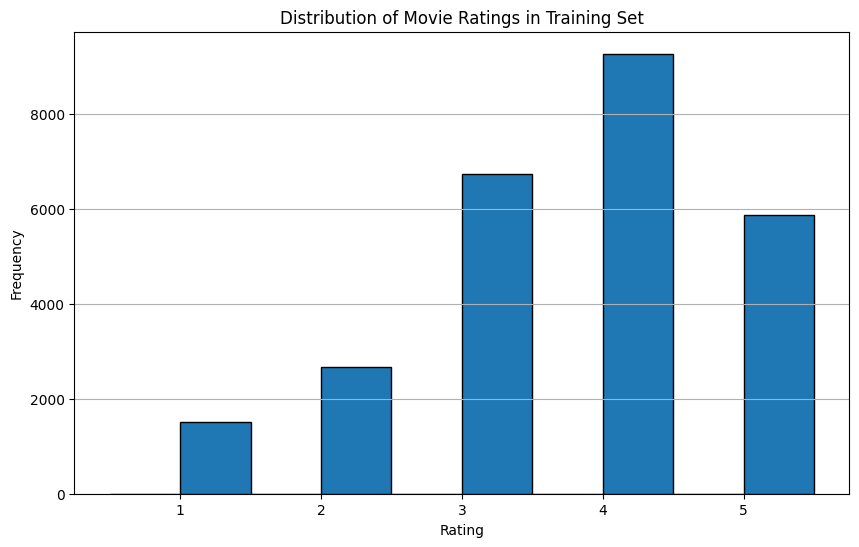

In [43]:

# Plot the distribution of movie ratings in the training set
plt.figure(figsize=(10, 6))
plt.hist(global_train_df['Rating'], bins=np.arange(0.5, 6, 0.5), edgecolor='black')
plt.title('Distribution of Movie Ratings in Training Set')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()